# __탄소 포인트제로 인한 연평균 자원 사용량__ #

>*2009년부터 시작한 탄소포인트제로 인한 2017년부터 2019년까지의 자원 사용량의 변화를 알아보기 위한 데이터 분석*


 <br/>


---

* ## 사용된 데이터셋 ##
   *  #### 한국환경공단_탄소포인트제_전국 참여자 현황_20200831 ####
     *  탄소포인트제 참여자들의 지자체별(시·도 시·군·구 별), 참여유형별 현황 관련 통계정보

 <br/>

   *  #### 한국환경공단_탄소포인트제 전기 사용량_20200910 ####
     *  탄소포인트제 참여자들의 지자체별(시·도 시·군·구 별) 연평균 전기 사용량 통계 자료 (감축현황)

 <br/>

   *  #### 한국환경공단_탄소포인트제 도시가스 사용량_20200910 ####
     *  탄소포인트제 참여자들의 지자체별(시·도 시·군·구 별) 도시가스 연평균 사용량 통계자료

 <br/>

   *  #### 한국환경공단_탄소포인트제 상수도 사용량_20200910 ####
     *  탄소포인트제 참여자들의 지자체별(시·도 시·군·구 별) 상수도 연평균 사용량 통계자료

---

 <br/>
 <br/>
 <br/>
 <br/>
 <br/>



> **구글 드라이브에서 데이터셋 불러오기**







In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [398]:
# 데이터셋 경로를 변수에 저장
data1 = "/content/drive/MyDrive/공공데이터/완료/3/한국환경공단_탄소포인트제_전국 참여자 현황_20200831.csv"
data2 = "/content/drive/MyDrive/공공데이터/완료/3/한국환경공단_탄소포인트제 전기 사용량_20200910.csv"
data3 = "/content/drive/MyDrive/공공데이터/완료/3/한국환경공단_탄소포인트제 도시가스 사용량_20200910.csv"
data4 = "/content/drive/MyDrive/공공데이터/완료/3/한국환경공단_탄소포인트제 상수도 사용량_20200910.csv"

 <br/>
  <br/>
   <br/>



> 라이브러리 불러오기



In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import platform
import seaborn as sns
%matplotlib inline

# 경고 메세지 출력방지
import warnings
warnings.filterwarnings("ignore")

# 지수 표현 (e+) 없애기
pd.options.display.float_format = '{:.5f}'.format

 <br/>
  <br/>
   <br/>



> ##### **한글 폰트 설치 코드**



In [ ]:
# 한글 폰트 구현을 위한 코드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 실행 후 런타임 재시작하기

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


 <br/>
  <br/>
   <br/>

## **데이터 분석**


> **데이터 확인하기**


In [ ]:
df_member = pd.read_csv(data1, encoding="cp949")
df_electric = pd.read_csv(data2, encoding="cp949")
df_gas = pd.read_csv(data3, encoding="cp949")
df_water = pd.read_csv(data4, encoding="cp949")

 <br/>

In [ ]:
df_member.shape

(208, 14)

In [ ]:
df_member.head()

,구분,개별단독,개별아파트(개인),개별아파트(상업),상업개인,상업법인,공공기관,학교,아파트(단지) 가입자수,아파트(단지) 세대수,학교(단지),건물(단지),합계 (가입자수),합계 (세대수)
0,강원 강릉시,2339,2987,0,19,4,54,0,8,2414,0,0,5411,7817
1,강원 고성군,2339,116,0,7,0,5,0,0,0,0,0,2467,2467
2,강원 동해시,395,857,0,5,0,2,0,6,3217,0,0,1265,4476
3,강원 삼척시,579,1333,0,5,0,5,0,13,5577,0,0,1935,7499
4,강원 속초시,343,921,0,39,3,6,2,2,435,0,0,1316,1749


In [ ]:
df_member.tail()

,구분,개별단독,개별아파트(개인),개별아파트(상업),상업개인,상업법인,공공기관,학교,아파트(단지) 가입자수,아파트(단지) 세대수,학교(단지),건물(단지),합계 (가입자수),합계 (세대수)
203,충북 제천시,1998,3398,0,18,2,8,4,12,7433,0,2,5442,12863
204,충북 증평군,3089,1279,0,134,0,9,2,20,8372,0,0,4533,12885
205,충북 진천군,2360,1509,0,8,2,7,4,7,2315,0,0,3897,6205
206,충북 청주시,4167,9593,0,42,14,9,22,76,54154,0,1,13924,68002
207,충북 충주시,1280,3349,0,12,1,1,11,11,6236,2,2,4669,10894


In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   구분            208 non-null    object
 1   개별단독          208 non-null    int64 
 2   개별아파트(개인)     208 non-null    int64 
 3   개별아파트(상업)     208 non-null    int64 
 4   상업개인          208 non-null    int64 
 5   상업법인          208 non-null    int64 
 6   공공기관          208 non-null    int64 
 7   학교            208 non-null    int64 
 8   아파트(단지) 가입자수  208 non-null    int64 
 9   아파트(단지) 세대수   208 non-null    int64 
 10  학교(단지)        208 non-null    int64 
 11  건물(단지)        208 non-null    int64 
 12  합계 (가입자수)     208 non-null    int64 
 13  합계 (세대수)      208 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 22.9+ KB


 <br/>

In [ ]:
df_electric.shape

(624, 3)

In [ ]:
df_electric.head()

,연도,지자체,전기 사용량
0,2019,강원 강릉시,40483181.00000
1,2017,강원 강릉시,42418767.00000
2,2018,강원 강릉시,40959267.00000
3,2019,강원 고성군,9237574.00000
4,2017,강원 고성군,9435320.00000


In [ ]:
df_electric.tail()

,연도,지자체,전기 사용량
619,2017,충북 청주시,63253278.00000
620,2018,충북 청주시,57326767.00000
621,2019,충북 충주시,17578271.00000
622,2017,충북 충주시,24380400.00000
623,2018,충북 충주시,14651238.00000


In [ ]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      624 non-null    int64  
 1   지자체     624 non-null    object 
 2   전기 사용량  624 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.8+ KB


 <br/>

In [ ]:
df_gas.shape

(543, 3)

In [ ]:
df_gas.head()

,연도,지자체,도시가스 사용량
0,2019,강원 강릉시,68472.00000
1,2018,강원 강릉시,57953.00000
2,2017,강원 강릉시,22055.00000
3,2019,강원 동해시,11337.00000
4,2018,강원 동해시,6829.00000


In [ ]:
df_gas.tail()

,연도,지자체,도시가스 사용량
538,2018,충북 청주시,362190.00000
539,2017,충북 청주시,240245.00000
540,2019,충북 충주시,193382.00000
541,2018,충북 충주시,173593.00000
542,2017,충북 충주시,129949.00000


In [ ]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        543 non-null    int64  
 1   지자체       543 non-null    object 
 2   도시가스 사용량  543 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.9+ KB


 <br/>

In [ ]:
df_water.shape

(613, 3)

In [ ]:
df_water.head()

,연도,지자체,상수도 사용량
0,2019,강원 강릉시,571816.00000
1,2017,강원 강릉시,528128.00000
2,2018,강원 강릉시,564605.00000
3,2019,강원 고성군,380045.00000
4,2018,강원 고성군,321917.00000


In [ ]:
df_water.tail()

,연도,지자체,상수도 사용량
608,2017,충북 청주시,1393151.00000
609,2019,충북 청주시,1588965.00000
610,2019,충북 충주시,558658.00000
611,2017,충북 충주시,459060.00000
612,2018,충북 충주시,476466.00000


In [ ]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       613 non-null    int64  
 1   지자체      613 non-null    object 
 2   상수도 사용량  613 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB


 <br/>
  <br/>
   <br/>


> **결측치 확인하기**


In [ ]:
True == 1
False ==  0

True

In [ ]:
df_member.isnull().sum()

구분              0
개별단독            0
개별아파트(개인)       0
개별아파트(상업)       0
상업개인            0
상업법인            0
공공기관            0
학교              0
아파트(단지) 가입자수    0
아파트(단지) 세대수     0
학교(단지)          0
건물(단지)          0
합계 (가입자수)       0
합계 (세대수)        0
dtype: int64

In [ ]:
df_electric.isnull().sum()

연도        0
지자체       0
전기 사용량    0
dtype: int64

In [ ]:
df_gas.isnull().sum()

연도          0
지자체         0
도시가스 사용량    0
dtype: int64

In [ ]:
df_water.isnull().sum()

연도         0
지자체        0
상수도 사용량    0
dtype: int64

 <br/>
  <br/>
   <br/>

## **데이터 전처리**


> **지역명 분리하기**


In [ ]:
# 지자체에서 지역명 분리하기

In [ ]:
region_member = []

for i in df_member["구분"]:
    region_slice = i[:2]
    region_member.append(region_slice)

print(len(region_member))

208


In [ ]:
region_electric = []

for i in df_electric["지자체"]:
    region_slice = i[:2]
    region_electric.append(region_slice)

print(len(region_electric))

624


In [ ]:
region_gas = []

for i in df_gas["지자체"]:
    region_slice = i[:2]
    region_gas.append(region_slice)

print(len(region_gas))

543


In [ ]:
region_water = []

for i in df_water["지자체"]:
    region_slice = i[:2]
    region_water.append(region_slice)

print(len(region_water))

613


In [ ]:
region = []

for i in region_member:
    if i not in region:
       region.append(i)
    else:
       pass


print(region)

['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']


In [ ]:
df_member["지역명"] = region_member
df_electric["지역명"] = region_electric
df_gas["지역명"] = region_gas
df_water["지역명"] = region_water

In [ ]:
# 지역명으로 인덱스 변경

df_member = df_member.set_index("지역명")
df_electric_r = df_electric.set_index("지역명")
df_gas_r = df_gas.set_index("지역명")
df_water_r = df_water.set_index("지역명")


# 연도로 인덱스 변경

df_electric_y = df_electric.set_index("연도")
df_gas_y = df_gas.set_index("연도")
df_water_y = df_water.set_index("연도")

 <br/>

In [ ]:
# 연도 리스트

year_list = ['2017', '2018', '2019']

 <br/>


> **가입자 평균값 구하기**


In [ ]:
print(region)

['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']


In [ ]:
# 가입자 유형 별 전체 가입자 수

all_list = []

all_members = sum(df_member.loc[:, "합계 (가입자수)"])
all_normal = sum(df_member.loc[:, "개별단독"]) + sum(df_member.loc[:, "개별아파트(개인)"])
all_commerce = sum(df_member.loc[:, "개별아파트(상업)"]) + sum(df_member.loc[:, "상업개인"]) + sum(df_member.loc[:, "상업법인"])
all_public = sum(df_member.loc[:, "공공기관"])
all_shool = sum(df_member.loc[:, "학교"]) + sum(df_member.loc[:, "학교(단지)"])

all_list.append(all_commerce)
all_list.append(all_public)
all_list.append(all_shool)
all_list.append(others)
	
others = all_members - (all_normal+all_commerce+all_public+all_shool)

In [ ]:
# 가입 비율

ratio = []

normal = all_normal / all_members *100
commerce = all_commerce / all_members *100
public = all_public / all_members *100
shool = all_shool / all_members *100
other = others / all_members *100

ratio.append(normal)
ratio.append(commerce)
ratio.append(public)
ratio.append(shool)
ratio.append(other)

labels = ['개인', '상업', '공공기관', '학교', '그 외']
label = ['상업', '공공기관', '학교', '그 외']

all_member_list = pd.DataFrame([all_list, label], index = ["가입자 수", "가입자 유형"], columns = label)
all_member_list = all_member_list.transpose()

print(all_member_list)

      가입자 수 가입자 유형
상업    12084     상업
공공기관   2713   공공기관
학교     2303     학교
그 외    5567    그 외


In [ ]:
# 지역별 가입자 평균값 구하기

subscriber_list = []

for i in region:
    sum_list = []
    try:
        is_sum = df_member.loc[i].sum()
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:13]
        is_subscriber = sum_list[0]
        subscriber_list.append(is_subscriber)
    except TypeError:
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:13]
        is_subscriber = sum_list[0]
        subscriber_list.append(is_subscriber)

print(subscriber_list)

[124335, 908780, 505795, 274718, 648398, 435159, 355007, 443232, 443232, 144508, 338306, 223193, 284073, 117663, 217290, 132338]


In [ ]:
# 지역별 가입 세대수 평균값 구하기

member_list = []

for i in region:
    sum_list = []
    try:
        is_sum = df_member.loc[i].sum()
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:12]
        is_member = sum_list[0]
        member_list.append(is_member)
    except TypeError:
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:12]
        is_member = sum_list[0]
        member_list.append(is_member)

print(member_list)

[42940, 223807, 191551, 116722, 354777, 135043, 94200, 83170, 83170, 34966, 97739, 110315, 181183, 99980, 78097, 46909]


In [ ]:
# 지역별 공공기관 가입 수 평균값 구하기

public_list = []

for i in region:
    sum_list = []
    try:
        is_sum = df_member.loc[i].sum()
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:6]
        is_public = sum_list[0]
        public_list.append(is_public)
    except TypeError:
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:6]
        is_public = sum_list[0]
        public_list.append(is_public)

print(public_list)

[282, 268, 94, 251, 7, 176, 60, 174, 174, 187, 63, 144, 737, 92, 117, 58]


In [ ]:
# 지역별 학교 가입 수 평균값 구하기

schoolalone_list = []

for i in region:
    sum_list = []
    try:
        is_sum = df_member.loc[i].sum()
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:7]
        is_school = sum_list[0]
        schoolalone_list.append(is_school)
    except TypeError:
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:7]
        is_school = sum_list[0]
        schoolalone_list.append(is_school)

schoolpark_list = []

for i in region:
    sum_list = []
    try:
        is_sum = df_member.loc[i].sum()
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:10]
        is_school = sum_list[0]
        schoolpark_list.append(is_school)
    except TypeError:
        for j in is_sum:
            sum_list.append(j)
        del sum_list[:10]
        is_school = sum_list[0]
        schoolpark_list.append(is_school)

school_list = []
count = 0

for i in schoolalone_list:

    for j in schoolpark_list:
        n = schoolpark_list[count]
        num = i + n / 2
        number = int(num) 
        school_list.append(number)
        count += 1
        break

print(school_list)

[6, 412, 69, 96, 252, 341, 10, 398, 398, 21, 6, 17, 200, 2, 114, 58]


 <br/>


> **전기 사용량 평균값 구하기**


In [ ]:
# 연도별 전기 사용량 평균값 구하기

In [ ]:
electric_ym = df_electric_y.groupby(["연도"])["전기 사용량"].mean()
print(electric_ym)

연도
2017   49451301.21346
2018   47877901.07274
2019   44555980.93389
Name: 전기 사용량, dtype: float64


In [ ]:
# 지역별 전기 사용량 평균값 구하기

In [ ]:
electric_rm = df_electric_r.groupby(["지역명"])["전기 사용량"].mean()
print(electric_rm)

지역명
강원    10813426.03704
경기    50326326.36065
경남    37497095.72727
경북    24599719.68116
광주   347652058.13333
대구    98650941.70833
대전    87781221.34667
부산    37625698.92500
세종    13238441.40000
울산    53914335.40000
인천    65685319.55133
전남    18065969.00000
전북    57351826.42857
제주   185109010.65000
충남    27981074.40000
충북    17593255.06061
Name: 전기 사용량, dtype: float64


In [ ]:
# 연도 지역별 전기 사용량 평균값 구하기

In [ ]:
electric = df_electric_r.loc[:, "전기 사용량"]

electric_list = []

for i in electric:
    i_round = round(i)
    electric_list.append(i_round)

electric_drop = df_electric_r.drop(["지자체", "전기 사용량"], axis = 1)
electric_drop.loc[:, "전기 사용량"] = electric_list
electric_drop.loc[:, "지역명"] = region_electric

print(electric_drop)

       연도    전기 사용량 지역명
지역명                    
강원   2019  40483181  강원
강원   2017  42418767  강원
강원   2018  40959267  강원
강원   2019   9237574  강원
강원   2017   9435320  강원
..    ...       ...  ..
충북   2017  63253278  충북
충북   2018  57326767  충북
충북   2019  17578271  충북
충북   2017  24380400  충북
충북   2018  14651238  충북

[624 rows x 3 columns]


In [ ]:
# 지역 연도별 전기 사용량 평균값 구하기

In [ ]:
es_list = []
ej_list = []
ey_list = []
count = 0

for i in region:
    electric_sum = electric_drop.loc[i].groupby('연도').sum()
    electric_sum = electric_sum.loc[:, "전기 사용량"]

    for j in electric_sum:
          es_list.append(j)

for m in range(16):
    for n in range(3):
        ej_list.append(region[count])
    
    count += 1

for r in range(16):
    for y in year_list:
        ey_list.append(y)
    
    count += 1

df_es = pd.DataFrame([ej_list, ey_list, ey_list, es_list], index = ["지역명", "연도", "년도", "전기 사용량"])
df_es = df_es.transpose()

print(df_es.head())

  지역명    연도    년도      전기 사용량
0  강원  2017  2017   198649570
1  강원  2018  2018   189897528
2  강원  2019  2019   195377908
3  경기  2017  2017  1822533746
4  경기  2018  2018  1618224833


 <br/>


> **도시가스 사용량 평균값 구하기**


In [ ]:
# 연도별 도시가스 사용량 평균값 구하기

In [ ]:
gas_ym = df_gas_y.groupby(["연도"])["도시가스 사용량"].mean()
print(gas_ym)

연도
2017   1915198.94189
2018   1759058.46448
2019   1639857.16393
Name: 도시가스 사용량, dtype: float64


In [ ]:
# 지역별 도시가스 사용량 평균값 구하기

In [ ]:
gas_rm = df_gas_r.groupby(["지역명"])["도시가스 사용량"].mean()
print(gas_rm)

지역명
강원     211036.48148
경기    1419860.23656
경남     857295.88702
경북     899521.62717
광주   24651003.33333
대구    4668536.54167
대전     226356.33333
부산    1451413.66667
세종     121624.00000
울산    2742924.37173
인천    1449525.77778
전남     377601.26000
전북    1745950.57895
제주      34310.00000
충남     141504.38095
충북      72238.51515
Name: 도시가스 사용량, dtype: float64


In [ ]:
# 연도 지역별 도시가스 사용량 평균값 구하기

In [ ]:
gas = df_gas_r.loc[:, "도시가스 사용량"]

gas_list = []

for i in gas:
    i_round = round(i)
    gas_list.append(i_round)

gas_drop = df_gas_r.drop(["지자체", "도시가스 사용량"], axis = 1)
gas_drop.loc[:, "도시가스 사용량"] = gas_list
gas_drop.loc[:, "지역명"] = region_gas

print(gas_drop)

       연도  도시가스 사용량 지역명
지역명                    
강원   2019     68472  강원
강원   2018     57953  강원
강원   2017     22055  강원
강원   2019     11337  강원
강원   2018      6829  강원
..    ...       ...  ..
충북   2018    362190  충북
충북   2017    240245  충북
충북   2019    193382  충북
충북   2018    173593  충북
충북   2017    129949  충북

[543 rows x 3 columns]


In [ ]:
# 지역 연도별 도시가스 사용량 평균값 구하기

In [ ]:
gs_list = []
gj_list = []
gy_list = []
count = 0

for i in region:
    gas_sum = gas_drop.loc[i].groupby('연도').sum()
    gas_sum = gas_sum.loc[:, "도시가스 사용량"]

    for j in gas_sum:
          gs_list.append(j)

for m in range(16):
    for n in range(3):
        gj_list.append(region[count])
    
    count += 1

for r in range(16):
    for y in year_list:
        gy_list.append(y)
    
    count += 1

df_gs = pd.DataFrame([gj_list, gy_list, gs_list], index = ["지역명", "연도", "도시가스 사용량"])
df_gs = df_gs.transpose()

print(df_gs.head())

  지역명    연도  도시가스 사용량
0  강원  2017   1628704
1  강원  2018   1996734
2  강원  2019   2072547
3  경기  2017  50148453
4  경기  2018  38065313


 <br/>


> **상수도 사용량 평균값 구하기**


In [ ]:
# 연도별 상수도 사용량 평균값 구하기

In [ ]:
water_ym = df_water_y.groupby(["연도"])["상수도 사용량"].mean()
print(water_ym)

연도
2017   3334498.55695
2018   1306022.01067
2019   1307837.32307
Name: 상수도 사용량, dtype: float64


In [ ]:
# 지역별 상수도 사용량 평균값 구하기

In [ ]:
water_rm = df_water_r.groupby(["지역명"])["상수도 사용량"].mean()
print(water_rm)

지역명
강원     214910.79630
경기    1385359.16919
경남    1257053.67333
경북     566506.54205
광주   11051163.41640
대구    3488623.31250
대전    3042281.94733
부산    9601138.71750
세종     569836.20667
울산    1254074.98000
인천    1878524.27789
전남     471984.11645
전북    1170329.45548
제주    1966630.70833
충남     565045.37913
충북     313970.00000
Name: 상수도 사용량, dtype: float64


In [ ]:
# 연도 지역별 상수도 사용량 평균값 구하기

In [ ]:
water = df_water_r.loc[:, "상수도 사용량"]

water_list = []

for i in water:
    i_round = round(i)
    water_list.append(i_round)

water_drop = df_water_r.drop(["지자체", "상수도 사용량"], axis = 1)
water_drop.loc[:, "상수도 사용량"] = water_list
water_drop.loc[:, "지역명"] = region_water

print(water_drop)

       연도  상수도 사용량 지역명
지역명                   
강원   2019   571816  강원
강원   2017   528128  강원
강원   2018   564605  강원
강원   2019   380045  강원
강원   2018   321917  강원
..    ...      ...  ..
충북   2017  1393151  충북
충북   2019  1588965  충북
충북   2019   558658  충북
충북   2017   459060  충북
충북   2018   476466  충북

[613 rows x 3 columns]


In [ ]:
# 지역 연도별 상수도 사용량 평균값 구하기

In [ ]:
ws_list = []
wj_list = []
wy_list = []
count = 0

for i in region:
    water_sum = water_drop.loc[i].groupby('연도').sum()
    water_sum = water_sum.loc[:, "상수도 사용량"]

    for j in water_sum:
          ws_list.append(j)

for m in range(16):
    for n in range(3):
        wj_list.append(region[count])
    
    count += 1

for r in range(16):
    for y in year_list:
        wy_list.append(y)
    
    count += 1

df_ws = pd.DataFrame([wj_list, wy_list, ws_list], index = ["지역명", "연도", "상수도 사용량"])
df_ws = df_ws.transpose()

print(df_ws.head())

  지역명    연도   상수도 사용량
0  강원  2017   3520320
1  강원  2018   3822782
2  강원  2019   4262081
3  경기  2017  45543733
4  경기  2018  41551547


 <br/>
  <br/>
   <br/>

## **데이터 시각화**


> **지역별 가입자 평균값**


In [ ]:
# 지역별 가입자 수

Text(0.5, 1.0, '지역별 가입자 평균값')

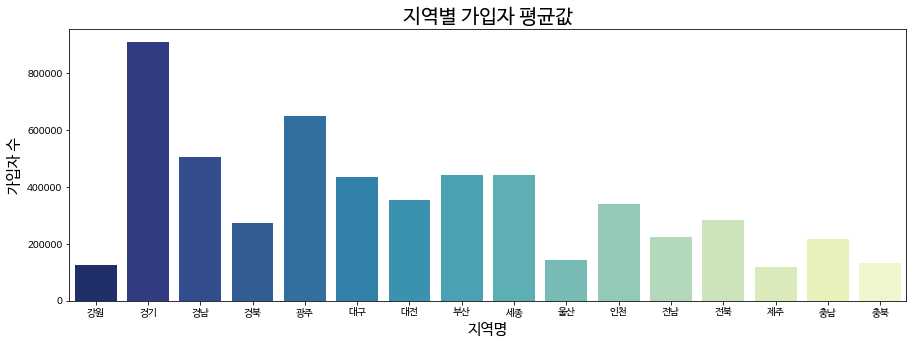

In [ ]:
# 지역별 가입자 평균값

plt.figure(figsize=(15, 5))

subscriber_graph = sns.barplot(data=df_member, x=region, y=subscriber_list, palette='YlGnBu_r')
subscriber_graph.set_xlabel("지역명", fontsize = 15)
subscriber_graph.set_ylabel("가입자 수", fontsize = 15)
subscriber_graph.set_title("지역별 가입자 평균값", fontsize = 20)

Text(0.5, 1.0, '지역별 가입 세대수 평균값')

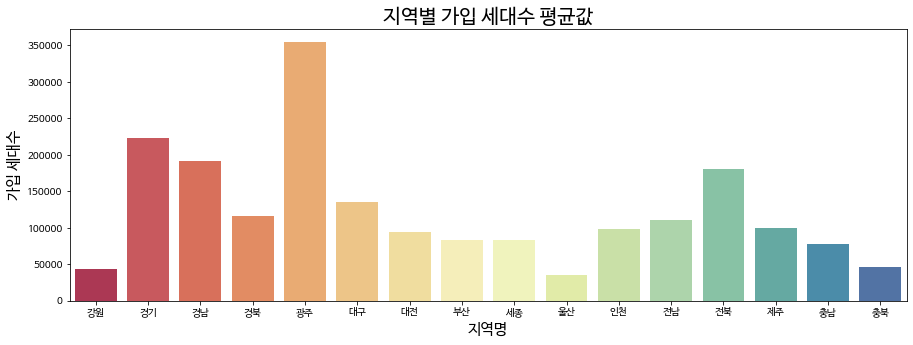

In [ ]:
# 지역별 가입 세대수 평균값

plt.figure(figsize=(15, 5))
member_graph = sns.barplot(data=df_member, x=region, y=member_list, palette='Spectral')
member_graph.set_xlabel("지역명", fontsize = 15)
member_graph.set_ylabel("가입 세대수", fontsize = 15)
member_graph.set_title("지역별 가입 세대수 평균값", fontsize = 20)

Text(0.5, 1.0, '지역별 가입 공공기관 평균값')

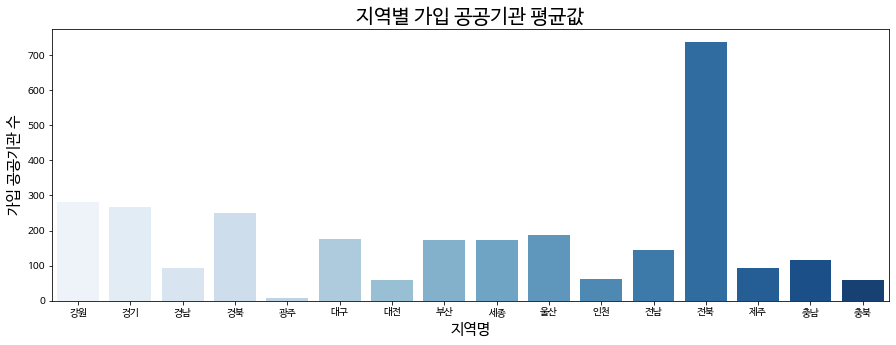

In [ ]:
# 지역별 공공기관 가입 수 평균값

plt.figure(figsize=(15, 5))
public_graph = sns.barplot(data=df_member, x=region, y=public_list, palette='Blues')
public_graph.set_xlabel("지역명", fontsize = 15)
public_graph.set_ylabel("가입 공공기관 수", fontsize = 15)
public_graph.set_title("지역별 가입 공공기관 평균값", fontsize = 20)

Text(0.5, 1.0, '지역별 가입 학교 평균값')

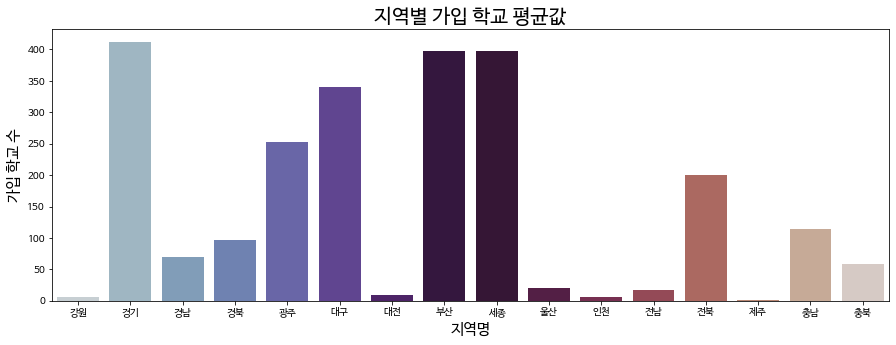

In [ ]:
# 지역별 학교 가입 수 평균값

plt.figure(figsize=(15, 5))
school_graph = sns.barplot(data=df_member, x=region, y=school_list, palette='twilight')
school_graph.set_xlabel("지역명", fontsize = 15)
school_graph.set_ylabel("가입 학교 수", fontsize = 15)
school_graph.set_title("지역별 가입 학교 평균값", fontsize = 20)

 <br/>

In [ ]:
# 총 가입자 수

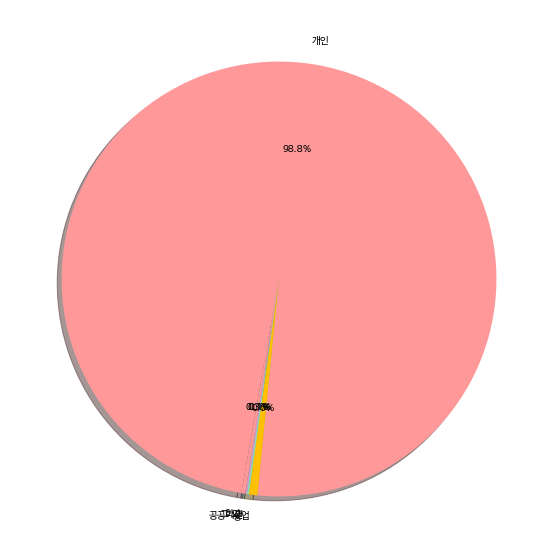

In [ ]:
# 가입자 비율

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.figure(figsize=(10, 10)) 
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, shadow=True)
plt.show()

Text(0.5, 1.0, '총 가입자 수 (개인 가입자 제외)')

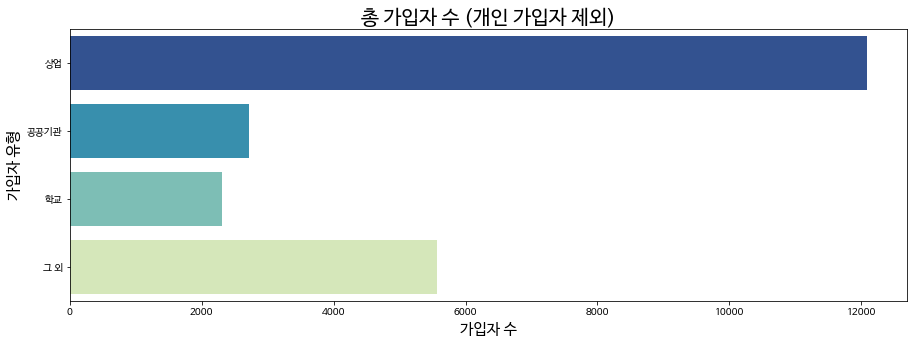

In [ ]:
# 총 가입자 수 (개인 가입자 수: 1895277)

plt.figure(figsize=(15, 5))
school_graph = sns.barplot(data=all_member_list, x="가입자 수", y="가입자 유형", palette='YlGnBu_r')
school_graph.set_xlabel("가입자 수", fontsize = 15)
school_graph.set_ylabel("가입자 유형", fontsize = 15)
school_graph.set_title("총 가입자 수 (개인 가입자 제외)", fontsize = 20)

<br>
<br>
<br>

> **전기 사용량 평균값**


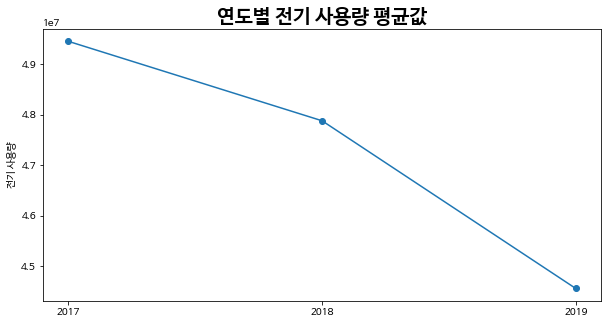

In [ ]:
# 연도별 전기 사용량 평균값

eym_list = []

for i in electric_ym:
    eym_list.append(round(i, 0))

x = year_list
y = eym_list

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')

plt.ylabel('전기 사용량')
plt.title('연도별 전기 사용량 평균값', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

Text(0.5, 1.0, '지역별 전기 사용량 평균값')

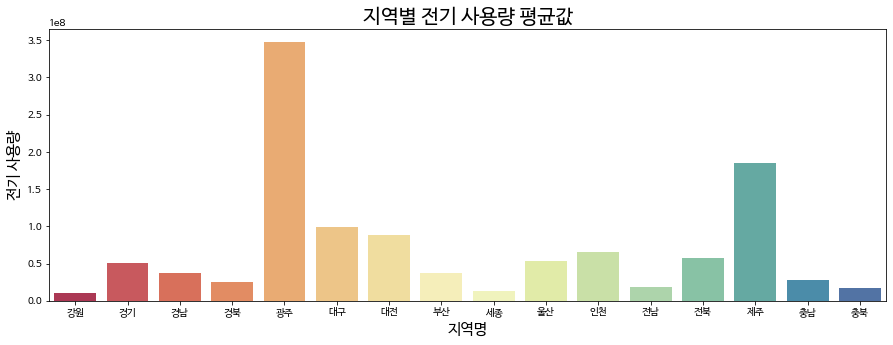

In [ ]:
# 지역별 전기 사용량 평균값

erm_list = []

for i in electric_rm:
    erm_list.append(round(i, 0))

x = region
y = erm_list

plt.figure(figsize=(15, 5))
erm_graph = sns.barplot(data=df_electric_r, x=x, y=y, palette='Spectral')
erm_graph.set_xlabel("지역명", fontsize = 15)
erm_graph.set_ylabel("전기 사용량", fontsize = 15)
erm_graph.set_title("지역별 전기 사용량 평균값", fontsize = 20)

<Figure size 1440x720 with 0 Axes>

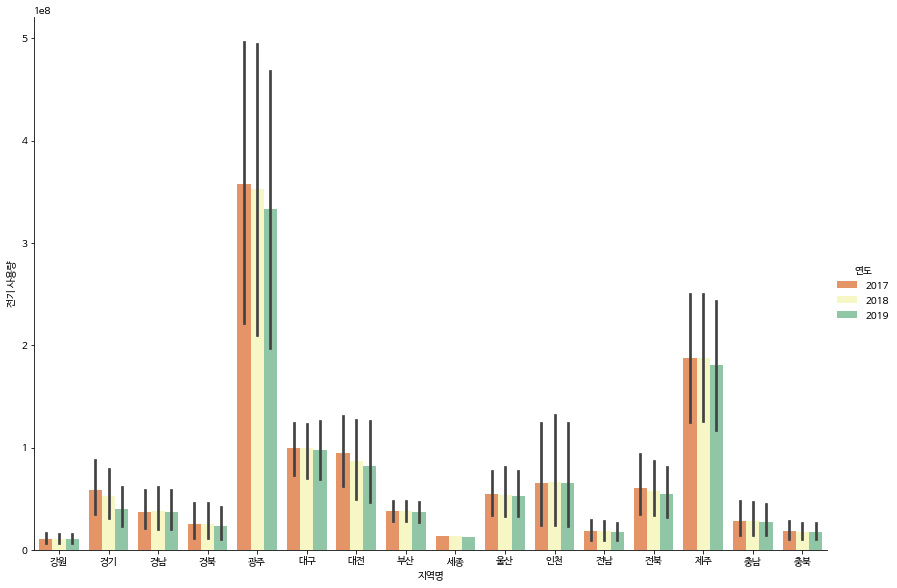

In [ ]:
# 연도 지역별 전기 사용량 평균값

plt.figure(figsize=(20, 10))
eyrm_graph = sns.catplot(data=electric_drop, x='지역명', y='전기 사용량', hue='연도', kind="bar", palette='Spectral', height=8.27, aspect=11.7/8.27)

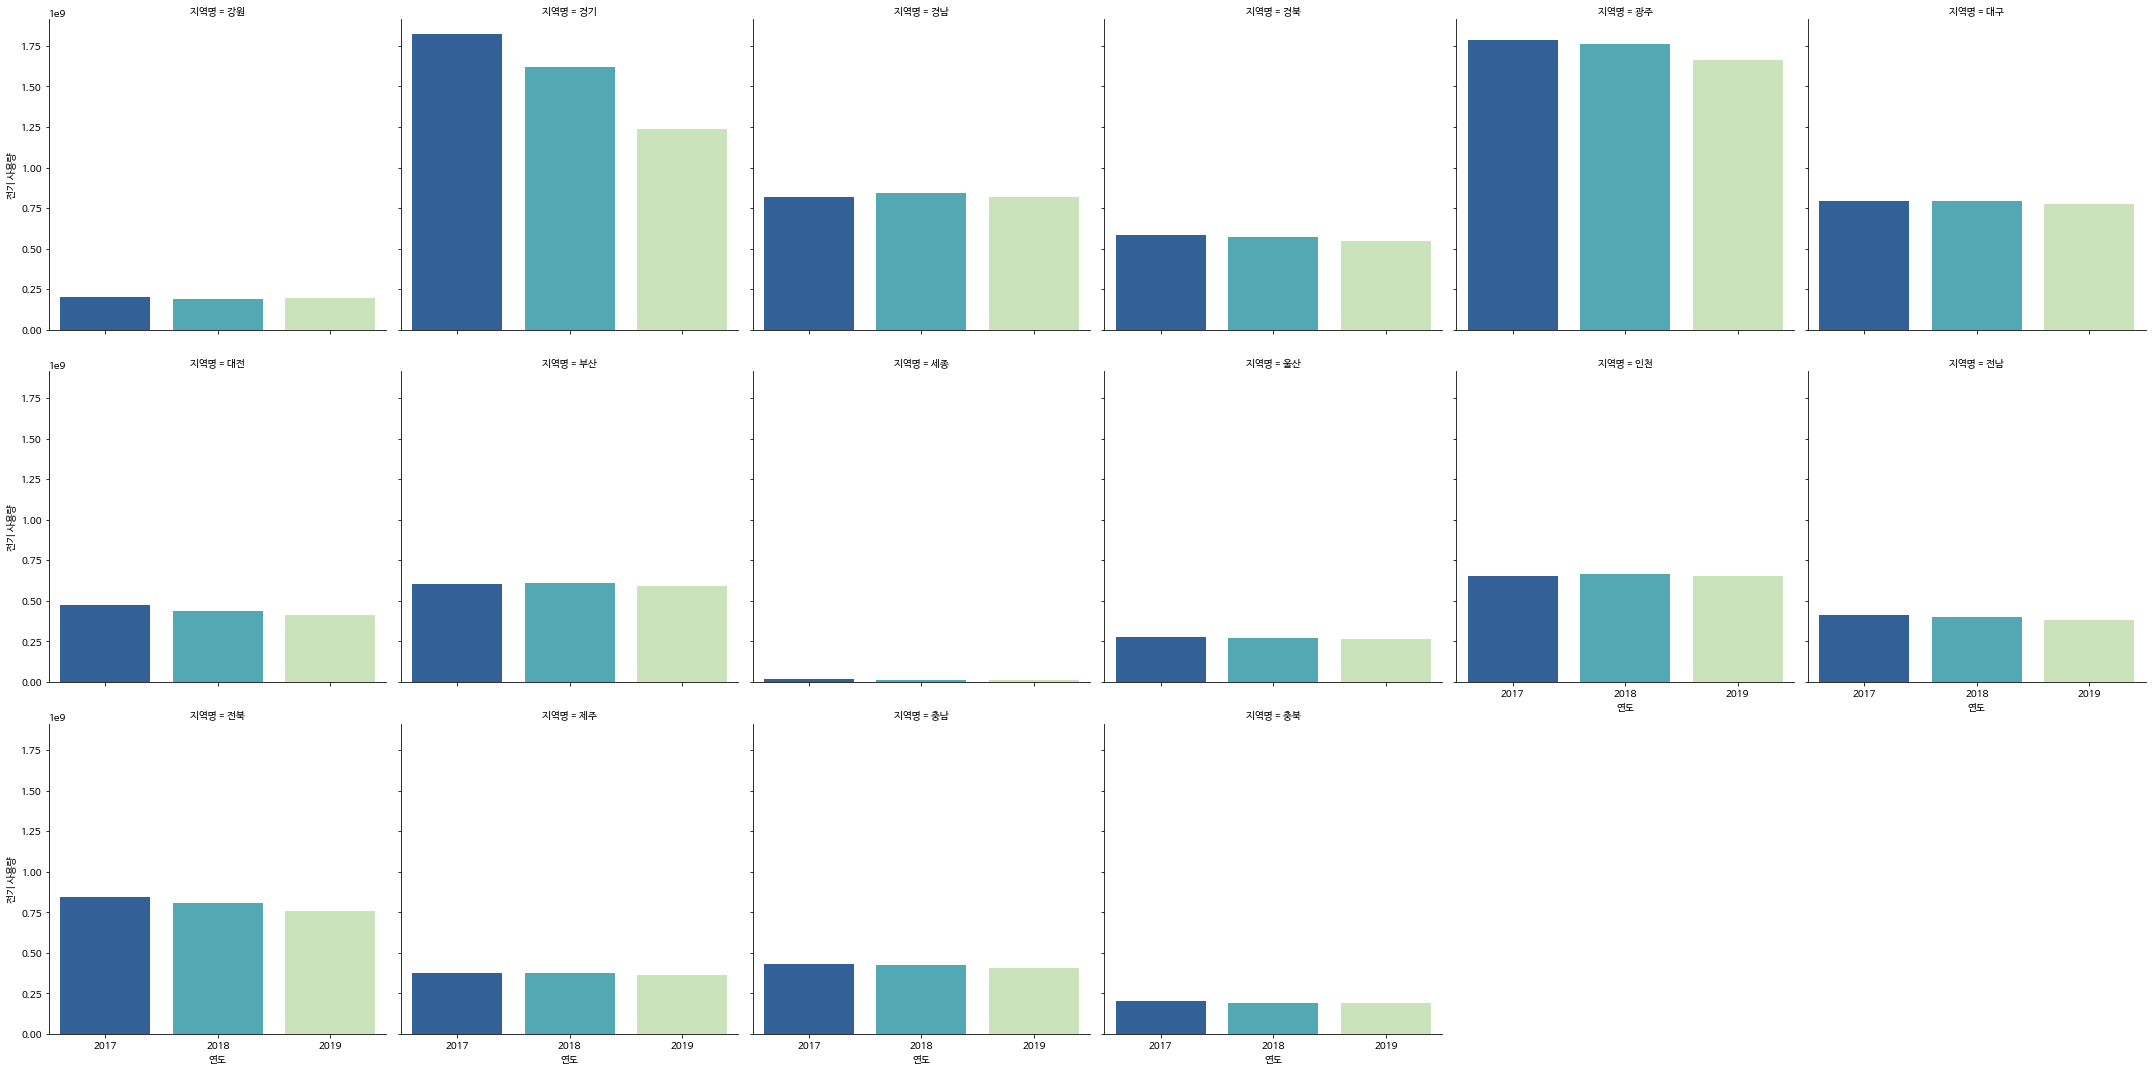

In [ ]:
# 지역 연도별 전기 사용량 평균값

sns.catplot(data=df_es, x="연도", y="전기 사용량", kind="bar", col="지역명", palette='YlGnBu_r', col_wrap=6)

 <br/>


> **도시가스 사용량 평균값**


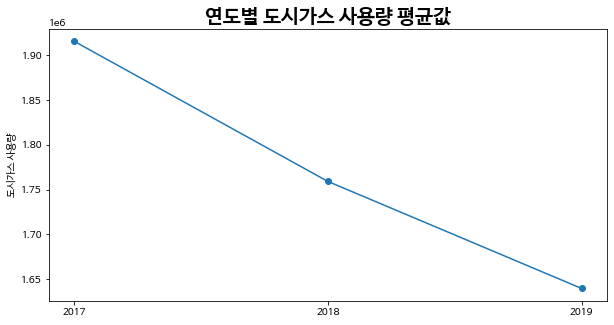

In [ ]:
# 연도별 도시가스 사용량 평균값

gym_list = []

for i in gas_ym:
    gym_list.append(round(i, 0))

x = year_list
y = gym_list

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')

plt.ylabel('도시가스 사용량')
plt.title('연도별 도시가스 사용량 평균값', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

Text(0.5, 1.0, '지역별 도시가스 사용량 평균값')

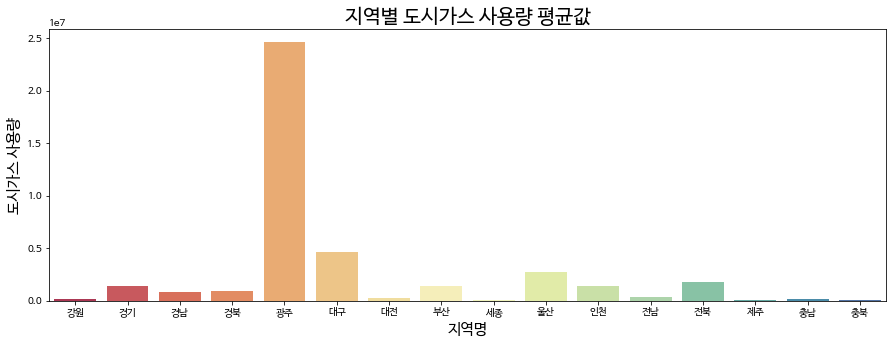

In [ ]:
# 지역별 도시가스 사용량 평균값

grm_list = []

for i in gas_rm:
    grm_list.append(round(i, 0))

x = region
y = grm_list

plt.figure(figsize=(15, 5))
grm_graph = sns.barplot(data=df_gas_r, x=x, y=y, palette='Spectral')
grm_graph.set_xlabel("지역명", fontsize = 15)
grm_graph.set_ylabel("도시가스 사용량", fontsize = 15)
grm_graph.set_title("지역별 도시가스 사용량 평균값", fontsize = 20)

<Figure size 1440x720 with 0 Axes>

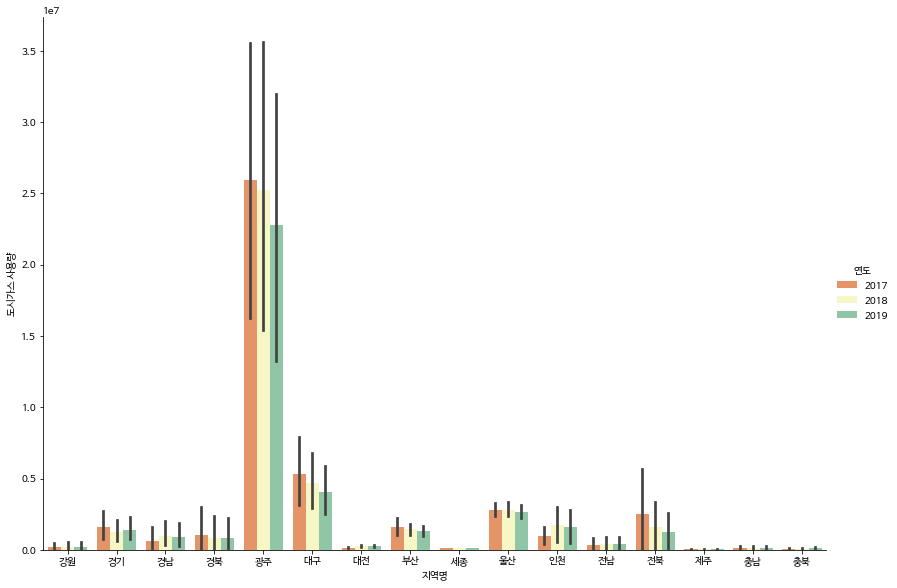

In [ ]:
# 연도 지역별 도시가스 사용량 평균값

plt.figure(figsize=(20, 10))
gyrm_graph = sns.catplot(data=gas_drop, x='지역명', y='도시가스 사용량', hue='연도', kind="bar", palette='Spectral', height=8.27, aspect=11.7/8.27)

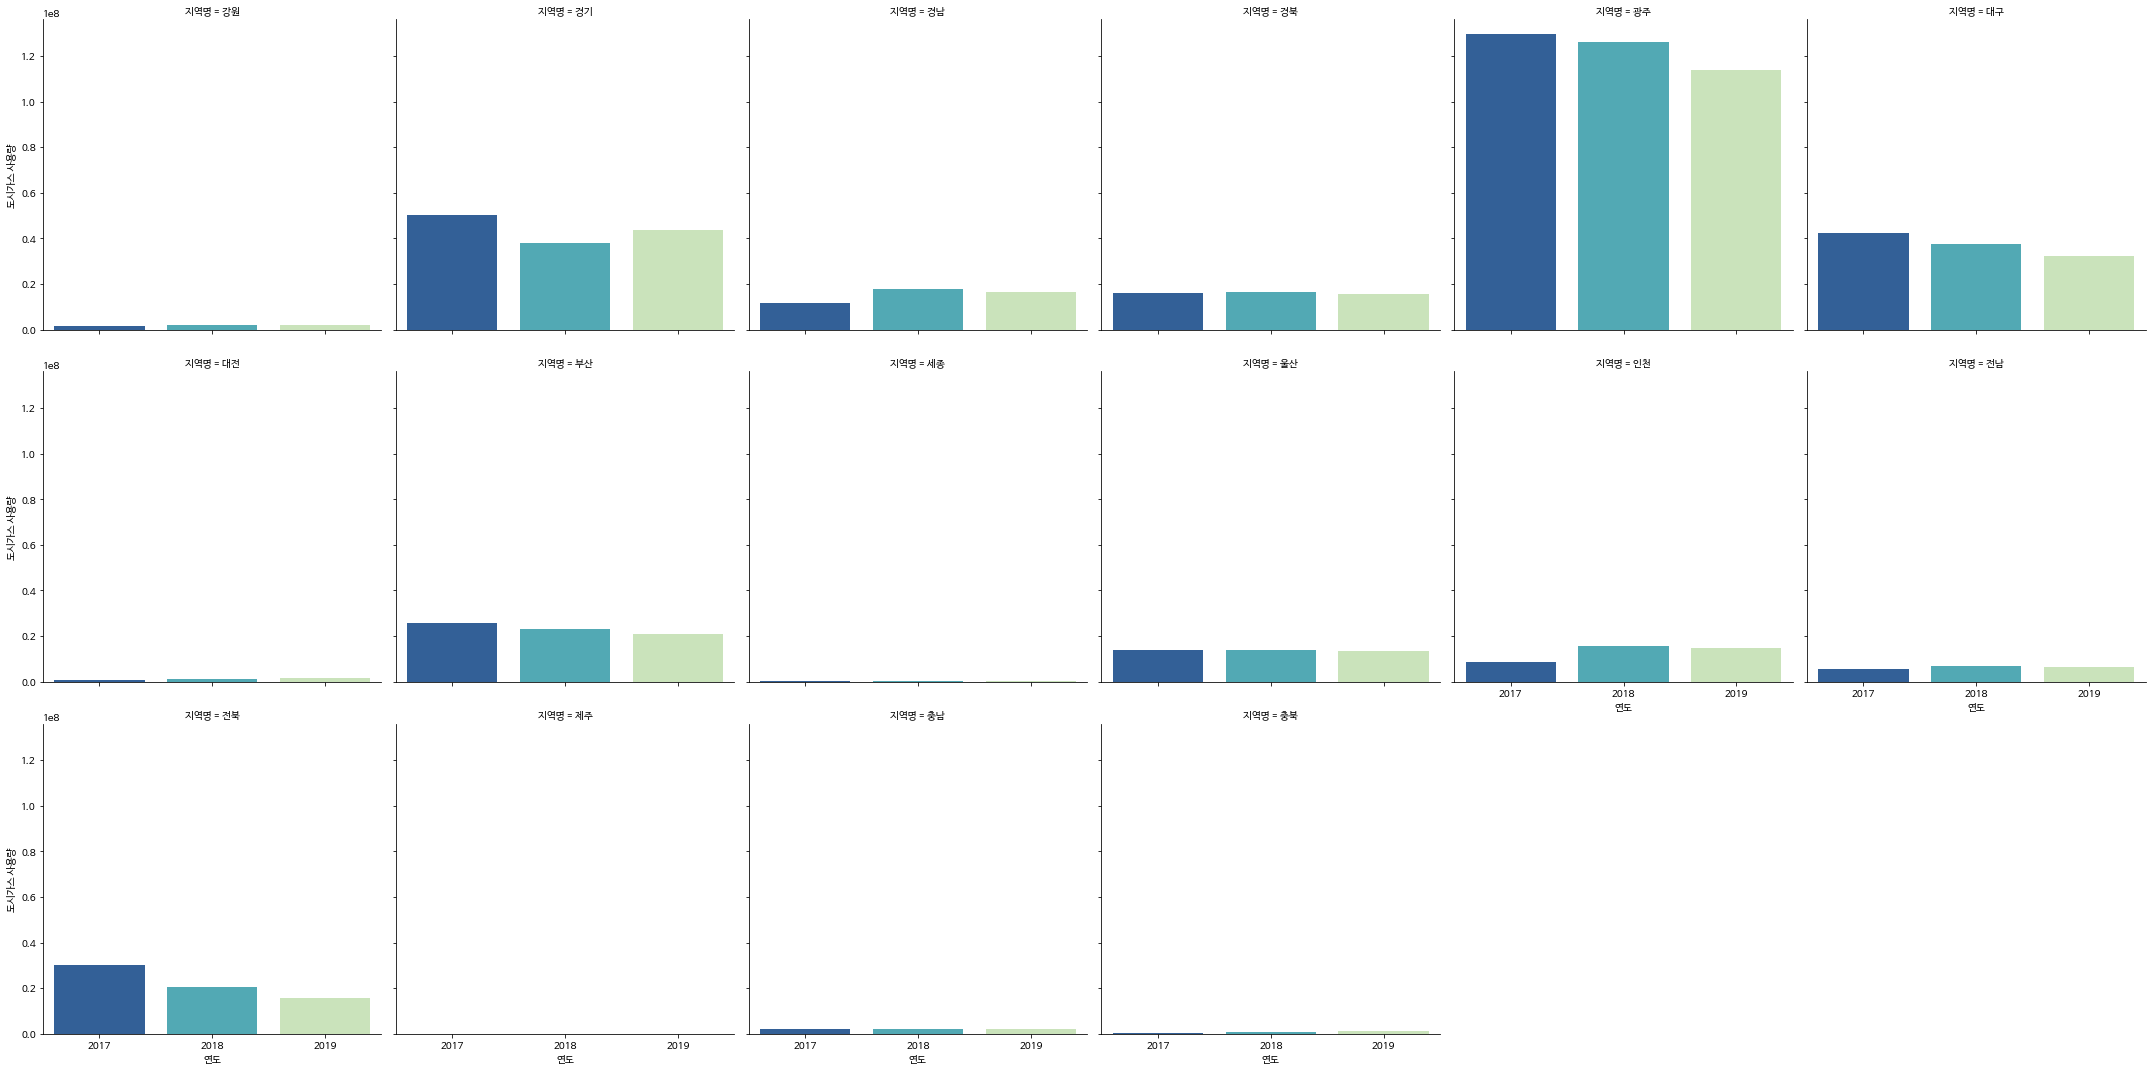

In [ ]:
# 지역 연도별 도시가스 사용량 평균값

sns.catplot(data=df_gs, x="연도", y="도시가스 사용량", kind="bar", col="지역명", palette='YlGnBu_r', col_wrap=6)

 <br/>


> **상수도 사용량 평균값**


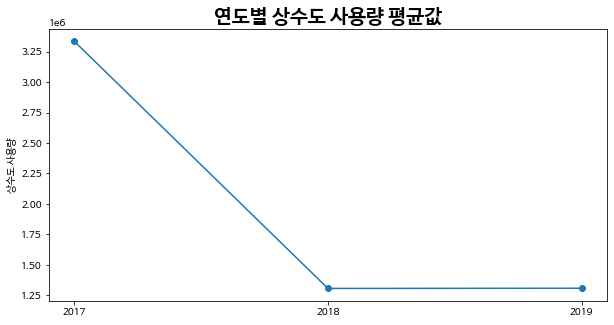

In [ ]:
# 연도별 상수도 사용량 평균값

wym_list = []

for i in water_ym:
    wym_list.append(round(i, 0))

x = year_list
y = wym_list

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')

plt.ylabel('상수도 사용량')
plt.title('연도별 상수도 사용량 평균값', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

Text(0.5, 1.0, '지역별 상수도 사용량 평균값')

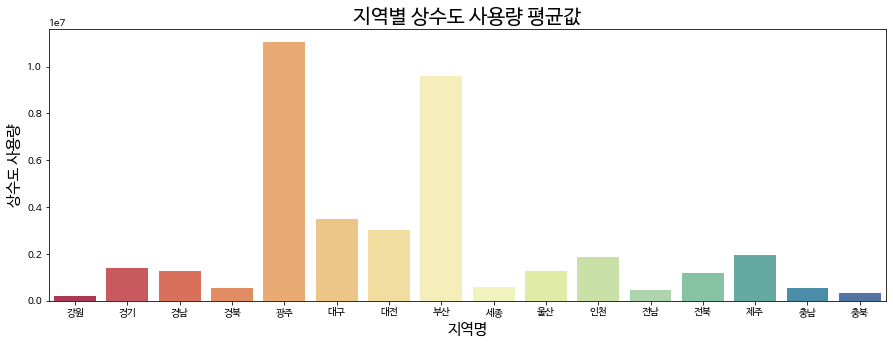

In [ ]:
# 지역별 상수도 사용량 평균값

wrm_list = []

for i in water_rm:
    wrm_list.append(round(i, 0))

x = region
y = wrm_list

plt.figure(figsize=(15, 5))
wrm_graph = sns.barplot(data=df_water_r, x=x, y=y, palette='Spectral')
wrm_graph.set_xlabel("지역명", fontsize = 15)
wrm_graph.set_ylabel("상수도 사용량", fontsize = 15)
wrm_graph.set_title("지역별 상수도 사용량 평균값", fontsize = 20)

<Figure size 1440x720 with 0 Axes>

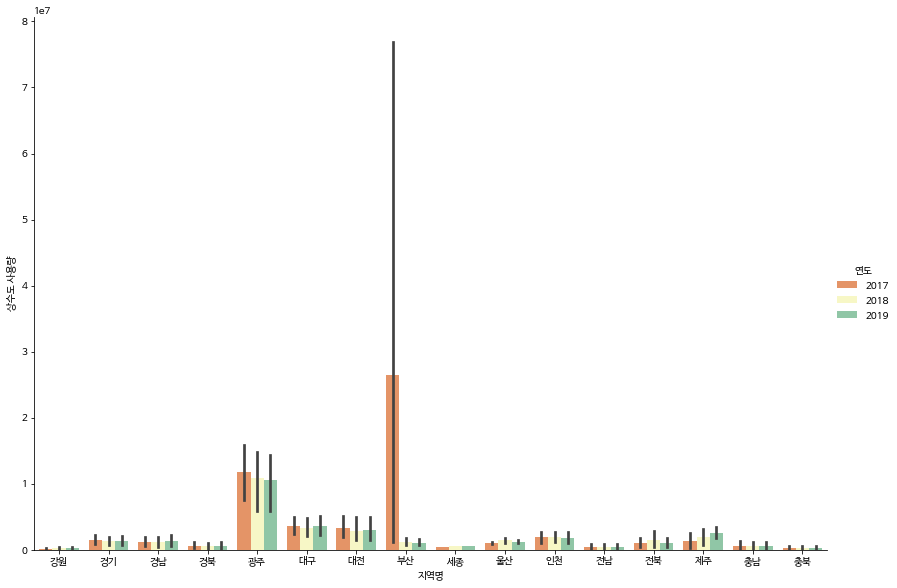

In [ ]:
# 연도 지역별 상수도 사용량 평균값

plt.figure(figsize=(20, 10))
wyrm_graph = sns.catplot(data=water_drop, x='지역명', y='상수도 사용량', hue='연도', kind="bar", palette='Spectral', height=8.27, aspect=11.7/8.27)

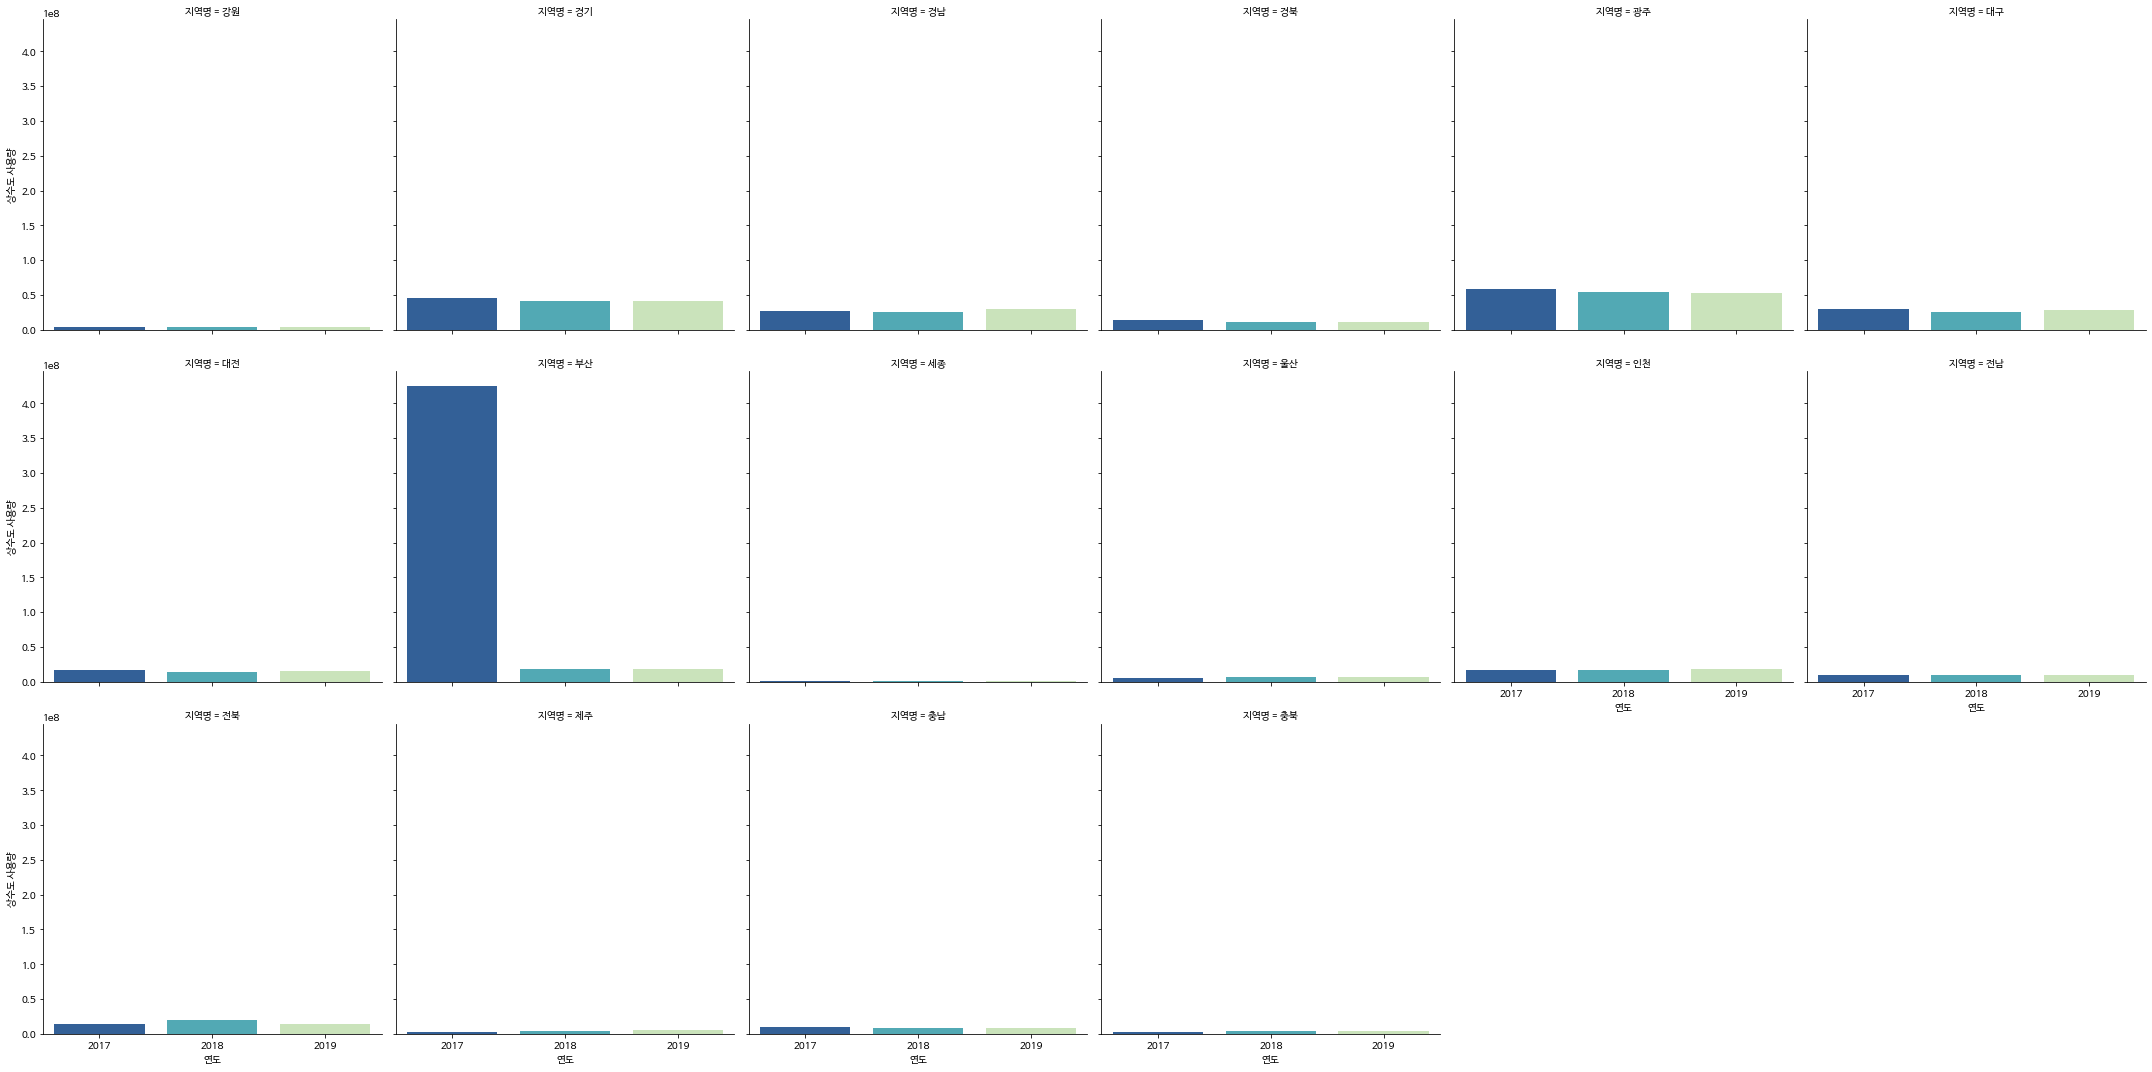

In [ ]:
# 지역 연도별 전기 사용량 평균값

sns.catplot(data=df_ws, x="연도", y="상수도 사용량", kind="bar", col="지역명", palette='YlGnBu_r', col_wrap=6)